In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 12):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

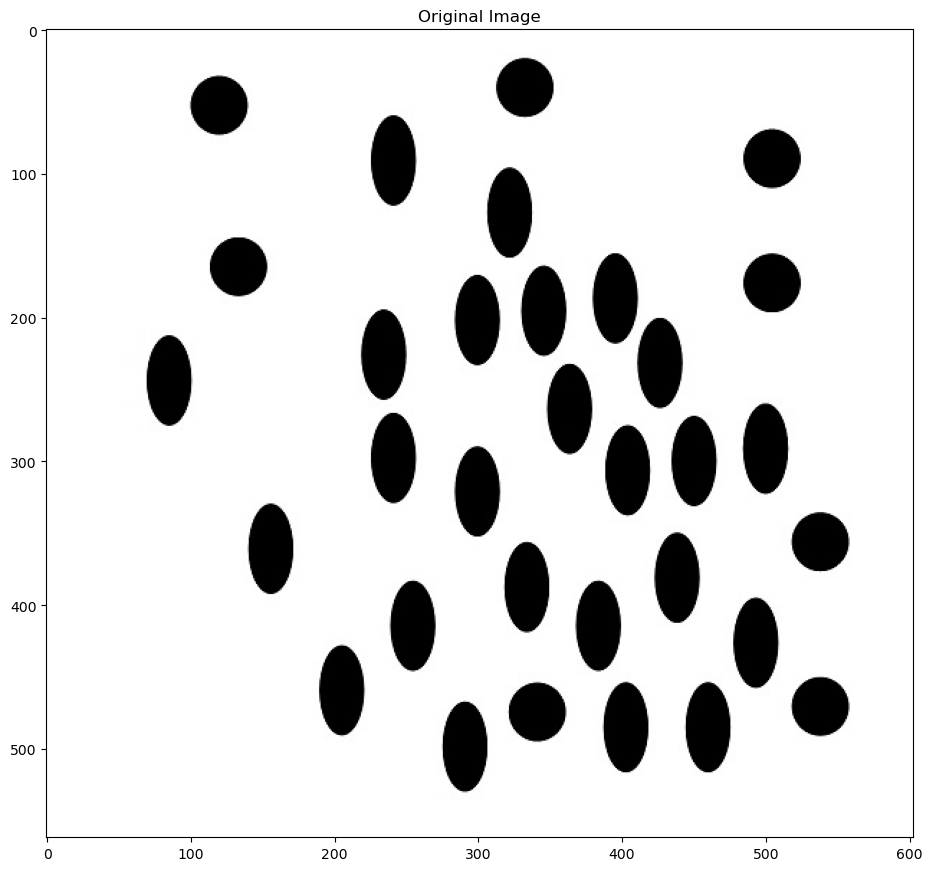

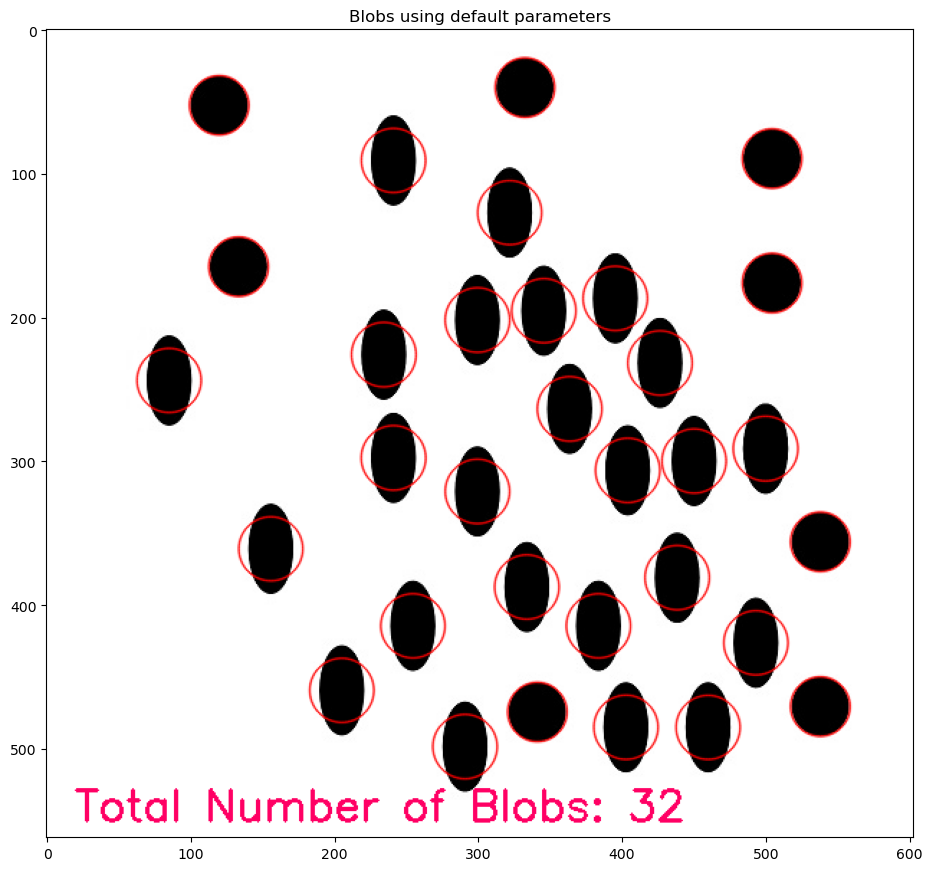

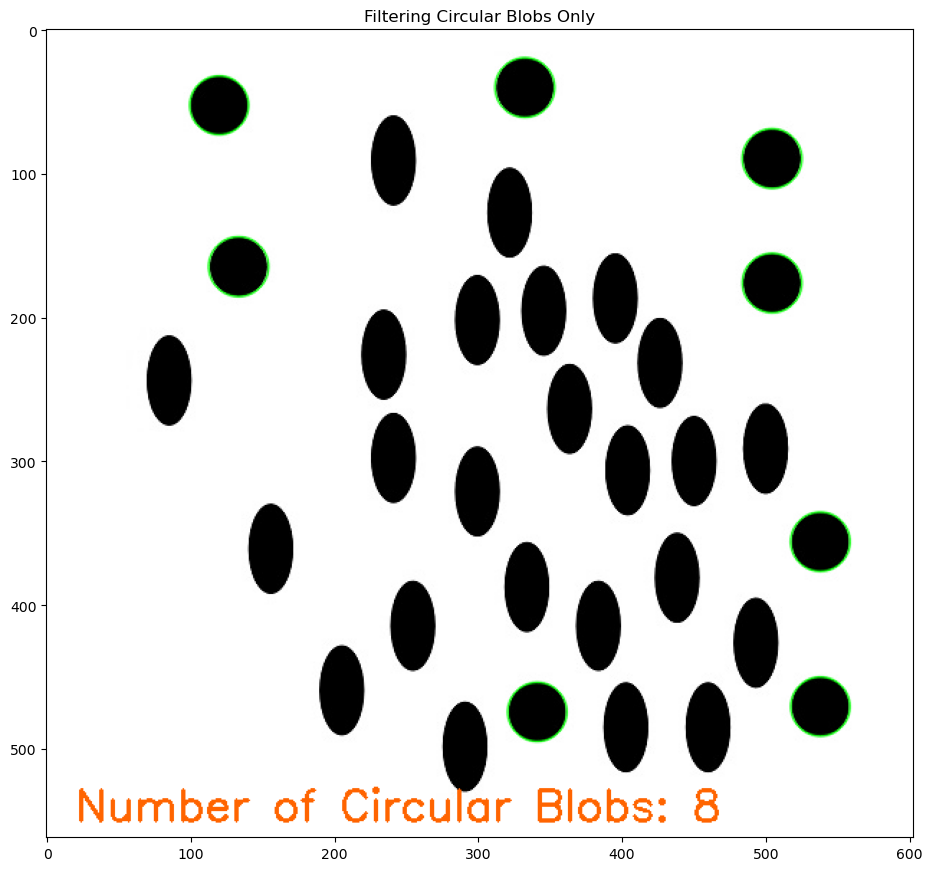

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image
image = cv2.imread("images/blobs2.jpg", 0)
imshow('Original Image',image)

# Intialize the detector using the default parameters
detector = cv2.SimpleBlobDetector_create()
 
# Detect blobs
keypoints = detector.detect(image)
 
# Draw blobs on our image as red circles
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,0,255),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Total Number of Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 0, 255), 2)

# Display image with blob keypoints
imshow("Blobs using default parameters", blobs)

# Set our filtering parameters
# Initialize parameter settiing using cv2.SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()

# Set Area filtering parameters
params.filterByArea = True
params.minArea = 100

# Set Circularity filtering parameters
params.filterByCircularity = True 
params.minCircularity = 0.9

# Set Convexity filtering parameters
params.filterByConvexity = False
params.minConvexity = 0.2
    
# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)
    
# Detect blobs
keypoints = detector.detect(image)

# Draw blobs on our image as red circles
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
imshow("Filtering Circular Blobs Only", blobs)


#### **Notes on Template Matching**

There are a variety of methods to perform template matching, but in this case we are using the correlation coefficient which is specified by the flag **cv2.TM_CCOEFF.**

So what exactly is the cv2.matchTemplate function doing?
Essentially, this function takes a “sliding window” of our waldo query image and slides it across our puzzle image from left to right and top to bottom, one pixel at a time. Then, for each of these locations, we compute the correlation coefficient to determine how “good” or “bad” the match is. 

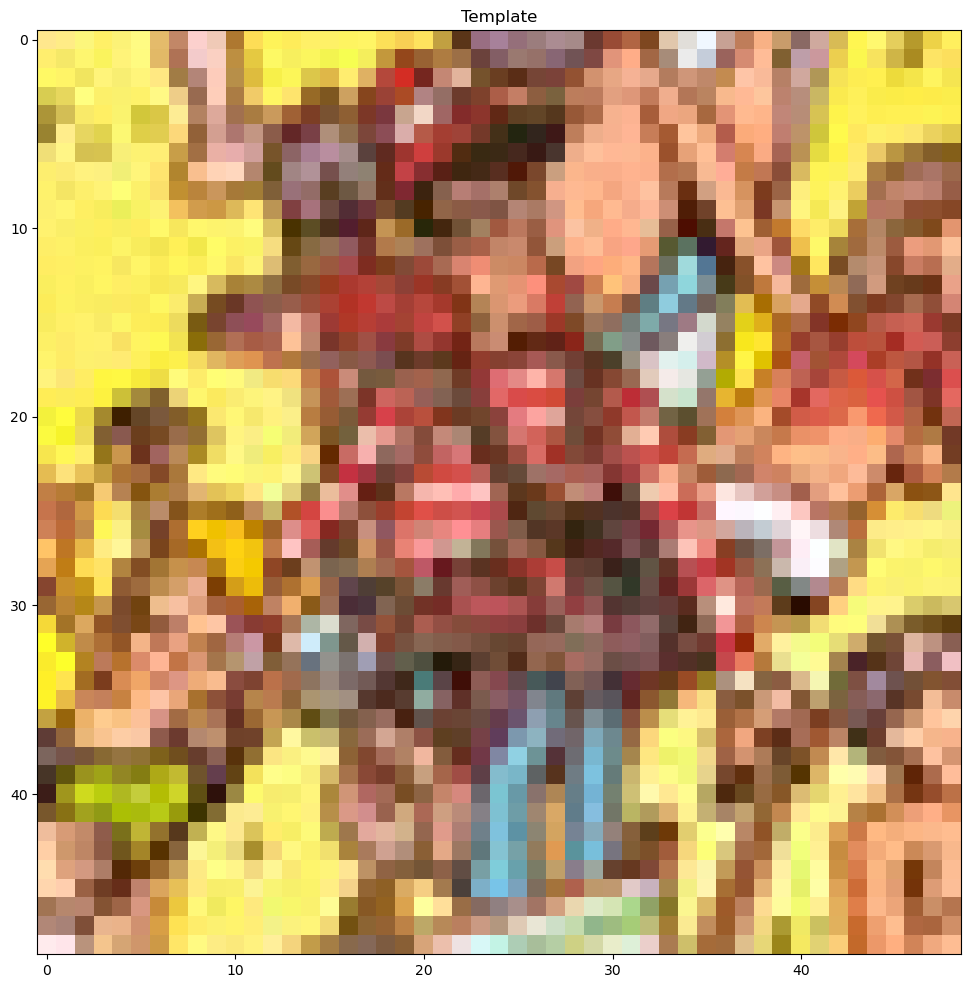

In [4]:
template = cv2.imread('./images/waldo.jpg')
imshow('Template', template)

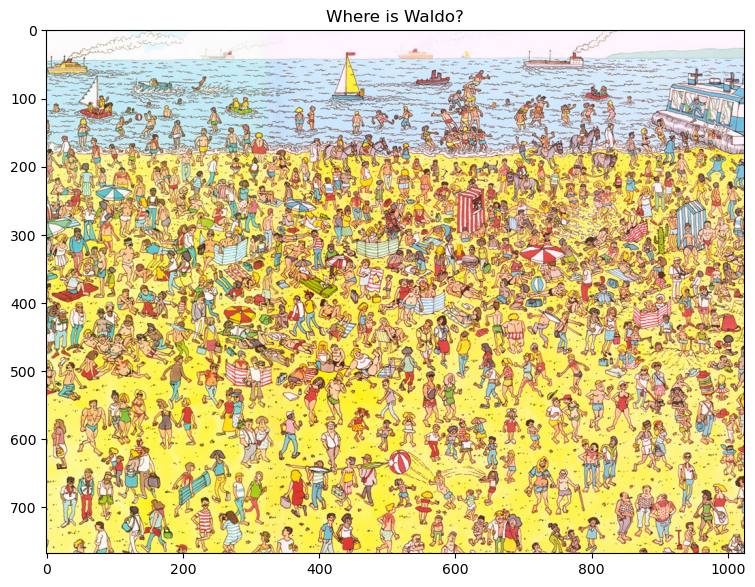

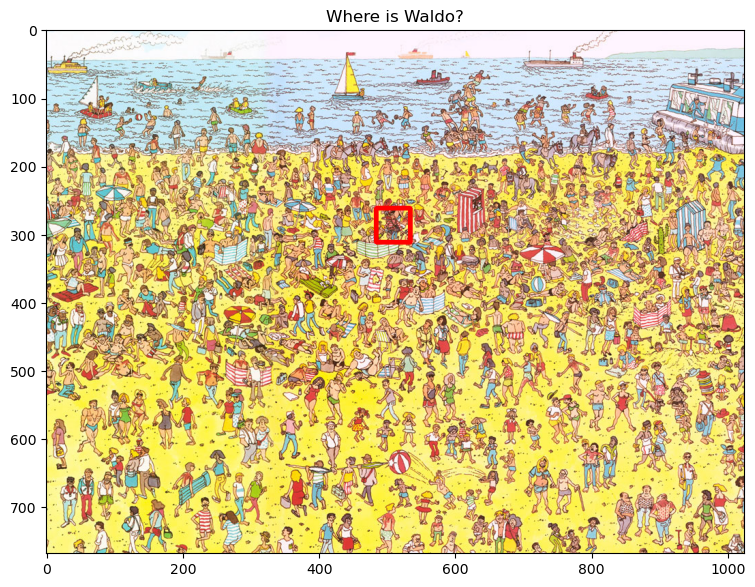

In [5]:
# Load input image and convert to grayscale
image = cv2.imread('./images/WaldoBeach.jpg')
imshow('Where is Waldo?', image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load Template image
template = cv2.imread('./images/waldo.jpg',0)

result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

#Create Bounding Box
top_left = max_loc
bottom_right = (top_left[0] + 50, top_left[1] + 50)
cv2.rectangle(image, top_left, bottom_right, (0,0,255), 5)

imshow('Where is Waldo?', image)